In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 농어(perch) 데이터 입력
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

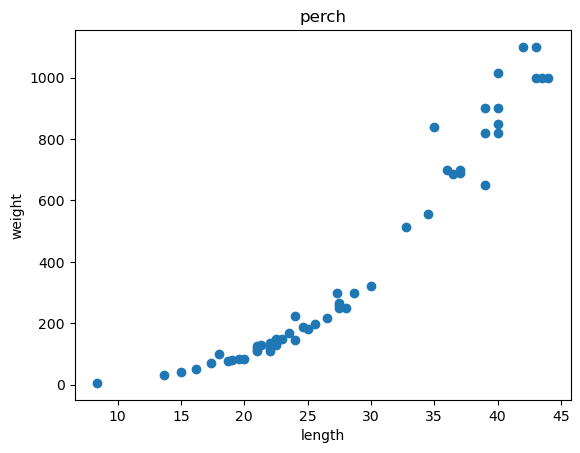

In [3]:
# 농어 데이터의 x축 length, y축 weight로 산점도 그리기.
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('perch')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
print(train_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [6]:
print(train_input.shape)

(42, 1)


In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [9]:
print(lr.predict([[50]]))

[1241.83860323]


In [10]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


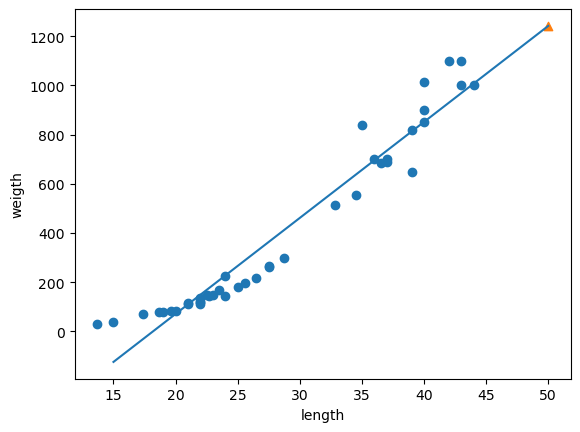

In [11]:
# 훈련 세트와 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [12]:
# 모델 평가
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


In [13]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 만들기
test_prediction = lr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

94.46122937985581
